# <span style='color:deepskyblue'> Cosmology MCMC notebook </span>

## <span style='color:deepskyblue'>Preliminaries</span>

In [1]:
# Install required packages (if not available on server)
!pip3 install getdist
!pip3 install scipy
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp

## <span style='color:deepskyblue'> The $\Lambda$CDM Model </span>

The Lambda-Cold-Dark-Matter ($\Lambda$CDM) Model is our concordance cosmological model. It postulates a Universe that behaves according to **General Relativity**, filled with **baryons** (protons, neutrons - the stuff we and stars are made of!), **Cold Dark Matter (CDM)** and a **Cosmological Constant** $\Lambda$.

The expansion of the Universe is best described in terms of the **scale factor** $a$ (the "radius" of the Universe, conventionally set to 1 today) and the **Hubble rate** $H$

$$
H \equiv \frac{\dot a}{a}
$$

The Einstein Equations in a **homogeneous, isotropic** Universe have an especially simple form and a special name, **Friedmann Equation**:

$$
H^2 = \frac{8\pi G}{3}\rho + \frac{k}{a^2}
$$

where $\rho$ is the total energy density of the Universe (at a certain time or size), and $k$ is a universal constant related to the [spatial curvature and shape of the Universe](https://en.wikipedia.org/wiki/Shape_of_the_universe#:~:text=The%20spatial%20curvature%20is%20related,indistinguishable%20spaces%20with%20different%20topologies.). In the $\Lambda$CDM model, this additionally simplifies to

$$
\boxed{
H^2 = H_0^2\left(\Omega_\Lambda + \Omega_m a^{-3} + \Omega_k a^{-2}\right)
}
\qquad
\qquad
\Omega_m + \Omega_\Lambda + \Omega_k = 1
$$

$H_0$ is the value of the Hubble rate *today*, and the parameters $\Omega_m$, $\Omega_\Lambda$ and $\Omega_k$ are dimensionless quantities indicating how much of the present expansion of the Universe is due to (non-relativistic) matter, cosmological constant $\Lambda$, and spatial curvature $k$. Note that the three $\Omega$'s are *not independent* (their sum is 1) and that we grouped together the contribution of baryons and CDM,

$$
\Omega_m = \Omega_{\rm CDM} + \Omega_{\rm b}
$$

and that we have evidence that independent evidence that $\Omega_b \approx 5$\%. Note that only $\Omega_m \geq 0$ makes physical sense, while in principle both $\Omega_\Lambda$ and $\Omega_k$ can be negative.

The present Hubble rate is conventionally parametrised in terms of the dimensionless $h$:

$$
H_0 \equiv h\,\frac{100 \text{km}}{\text{s Mpc}}
$$

where Mpc = Megaparsec and [parsec](https://en.wikipedia.org/wiki/Parsec) equals to about $3.26$ light years or $3.086 \cdot 10^{16}$ m. 

In essence, these equations give us the relation between *what exists in the Universe* and *how the Universe expanded*. Measure one, I can tell you the other. This is precisely what we aim to do!

Time to define the function $H(z)$. Don't forget to include the useful parameters as arguments of the function, and to define `parsec`.

##  <span style='color:deepskyblue'>Section 1</span>

In this calculation we are calculating the Hubble parameter describing the expansion of the universe. 

Parameters used in this section:

- h0: Hubble constant in km/s/Mpc
- omegalambda: Dark energy density parameter
- omegak: Curvature density parameter 
- omegamatter: Matter density parameter
- z: Redshift value

A higher H(z) value in the past would mean that the universe was expanding faster back then. This formula allows us to research the expansions rate at any time, if we know the redshift at that time. 
* formula assumes standard cosmological model

In [46]:
# one parsec in meters
parsec = 3.0857*(10**16)

# little h as taken from the internet
h = 0.7
h0 = h*(100)

# omega values taken from the cosmology lecture by lorenzo
omegalambda = 0.7
omegamatter = 0.3
omegak = 1-(omegalambda+omegamatter)

# choose a redshift value
z = 1

# the hubble rate as per the formula on the slides, slide 10
# removed omegar because negligible
def Hubble(h0, omegalambda, omegak, omegamatter, z):
    hubble = h0 * np.sqrt(omegalambda + (omegak * (1+z)**2) + (omegamatter * (1+z)**3))
    return hubble

# call the hubble rate function we created above and add input parameters
hz = Hubble(h0, omegalambda, omegak, omegamatter, z)

# print the value that the hubble rate function sent back to you 
print(f"The value of H(z) is: {hz} km/s/Mpc")

The value of H(z) is: 123.24771803161305 km/s/Mpc


##  <span style='color:deepskyblue'>Supernovae Ia</span>

In order to track the expansion of the Universe, we will look at Supernovae type Ia observations. SNIa are formed when a *white dwarf* accretes matter from a companion until it reaches a critical mass of about $1.44 M_\odot$ (solar masses), after which it explodes **at always the same luminosity** $L_{\rm SN}$. Therefore, the observed [magnitude](https://en.wikipedia.org/wiki/Magnitude_(astronomy)) is only a function of their [**luminosity distance**](https://en.wikipedia.org/wiki/Distance_measures_(cosmology)) from Earth, defined as the ratio of the intrinsic luminosity $L_{\rm SNIa}$ and the measured *surface brightness* $\Phi$ (energy per unit time per unit area)

$$ d_L\equiv \frac{L_{\rm SN}}{4\pi \Phi} $$

While photons (light rays) travel from the distant SNIa to Earth, the Universe expands and the photons get redshifted, and this redshift is directly related to the size of the Universe when the photon was emitted compared to today:

$$ \frac{\lambda_{\rm obs}}{\lambda_{\rm em}} \equiv 1 + z_{\rm em} = \frac{1}{a_{\rm em}}$$

We can express the luminosity distance in terms of the Hubble rate:

$$ 
\boxed{
d_L(z) = \frac{c}{H_0}(1+z) \times 
\begin{cases}
    \cfrac{1}{\sqrt{\Omega_k}} \sinh\left(\sqrt{\Omega_k}D(z)\right) & \Omega_k > 0
    \\[.5em]
    D(z) & \Omega_k = 0
    \\[.5em]
    \cfrac{1}{\sqrt{-\Omega_k}} \sin\left(\sqrt{-\Omega_k}D(z)\right) & \Omega_k < 0
\end{cases}
\qquad\qquad
D(z) \equiv H_0\int_0^z \frac{{\rm d}Z}{H(Z)}
}
$$

where $c$ is the speed of light: $c \simeq 2.998 \cdot 10^{5}$ km/s.

Clearly, there exists a relation between $d_L(z)$ and $H(z)$, so the luminosity distance is a useful measure of the Universe expansion history.

We can create the function `dL(z, h, Omega_m, Omega_L)`. You can also pass the function `Hubble` as an argument: `dL(z, Hubble, Omega_m, Omega_Lambda)`. Additionally, you can create $D(z)$ for your convenience.

Note that you need to integrate the function $H(z)$, so write your own quick-and-easy numerical integrator or [look up the pre-written methods](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html). Make sure it returns $d_L$ in parsecs and that it uses $H_0$ measured in km/s/Mpc!

##  <span style='color:deepskyblue'>Section 2</span>

In this section we compute the luminosity distance. The final term of the luminosity distance formula depends on the value of omega k. 
- An omega k with a positive value relates to an open universe.
- An omega k with a value = 0 relates to a flat universe.
- An omega k with a negative value relates to a closed universe.

In [47]:
# integration examples followed from the website: https://www.freecodecamp.org/news/calculate-definite-indefinite-integrals-in-python/
from scipy.integrate import quad

# speedoflight in km/s
c = 2.998*(10**5)

# interate to determine D(z)
def integrand(z):
    return h0*(1/Hubble(h0, omegalambda, omegak, omegamatter, z))

# let's only take the first number returned in the tupple and disregard the uncertainty
dz, _ = (quad(integrand, 0, z))

# calculating the last part of the dl equation that depends on the omegak value
def d(z, c, h0, dz):

    if omegak > 0:
        return (np.sinh(np.sqrt(omegak)*dz))/(np.sqrt(omegak))
    elif omegak == 0:
        return dz
    else:
        return (np.sin(np.sqrt(-1*omegak)*dz))/(np.sqrt(-1*omegak))
    
# adding the last part to the full equation to obtain luminosity distance 
def dL(z, c, h0, dz):
    return (c/h0)*(1+z)*d(z, c, h0, dz)

finalanswer = dL(z, c, h0, dz)
print(f"The luminosity distance is {finalanswer*10**6} parsecs")

The luminosity distance is 6607823843.287365 parsecs


## <span style='color:deepskyblue'>The Union2.1 Compilation</span>

Our source of data is from [Union2.1](http://supernova.lbl.gov/Union/). It is a collection of $580$ SNIa, each observation is comprised of redshift $z$ and [distance modulus](https://en.wikipedia.org/wiki/Distance_modulus) $\mu$ (and corresponding errors $\delta\mu$), defined as the difference between the *apparent magnitude* $m$ and the *absolute magnitude* $M$:

$$
\boxed{
\mu(z) \equiv m(z) - M \equiv 5 \log_{10} \frac{d_L(z)}{10\,\text{pc}}
}
$$

Our goal today is to use SNIa measurements to constrain the parameters ($h, \Omega_\Lambda, \Omega_m$).

In essence, we can calculate for each redshift the theoretical value of $\mu$ using this equation with the expression for $d_L(z)$ and our model of choice $H(z)$ -- note that we will need to perform a numerical integral! -- and compare this value with observations. A different model would amount to changing the theoretical value of $H(z)$.

Let us start by importing and plotting the data:

## <span style='color:deepskyblue'>Section 3</span>

In this section we extract observational data saved in a textfile. From the columns we extracted redshift data, distance modulus and the error on it. This gives us values to compare our theoretical predictions to at a later stage. 

Parameters:

- zs: Redshift values measuring how much light has stretched 
- Distance modulus: related to luminosity distance, telling us how far the object is 
- Errors: uncertainty in the above distance 

In [48]:
# specify the path of where the textfile is located if downloaded on your local computer
dataloc = "/Users/mckenziepedro/Desktop/Big Data/Week_1/week2_data.txt"

# read in data as numpy array
# format is [name, redshift, magnitude, magnitude error, and another number?]
data = np.genfromtxt(dataloc)

# print the first line as an example. (Note that genfromtxt turns the names into 'Not A Number')
print(data[0])

[      nan  0.028488 35.346583  0.223906  0.128419]


In [49]:
# pull out the redshifts (zs), distance modulus (dist_mod) and magnitude estimated errors (err_dist_mod)
zs = data.T[1]
dist_mod = data.T[2]
err_dist_mod = data.T[3]

# verify that it is printing the redshift column
print (zs)

[0.028488 0.050043 0.052926 0.070086 0.062668 0.087589 0.078577 0.017227
 0.042233 0.045295 0.03648  0.019599 0.100915 0.027342 0.074605 0.026489
 0.049922 0.030604 0.016346 0.015436 0.030529 0.024525 0.023953 0.026038
 0.048948 0.024314 0.015166 0.03572  0.048818 0.02198  0.1244   0.036
 0.016321 0.01673  0.0275   0.021793 0.01645  0.023208 0.036457 0.019264
 0.017605 0.031528 0.023536 0.016743 0.05371  0.016991 0.027865 0.017173
 0.029955 0.016559 0.015    0.0544   0.1561   0.0393   0.1241   0.1441
 0.1299   0.0784   0.0583   0.0309   0.0406   0.0152   0.0224   0.016
 0.0362   0.0173   0.0312   0.0221   0.016    0.0249   0.0303   0.0283
 0.0152   0.0345   0.036    0.0248   0.0292   0.0163   0.0187   0.0195
 0.0256   0.0337   0.0546   0.024    0.0336   0.0341   0.0261   0.0211
 0.0321   0.0221   0.0334   0.0341   0.0421   0.0576   0.0205   0.0402
 0.026    0.0259   0.0239   0.069    0.0651   0.0229   0.0315   0.0215
 0.0255   0.0325   0.0843   0.0308   0.0327   0.0423   0.0684   0.015

In [50]:
# let's look at the data, just for fun. 
# we can look both at the raw data (distance modulus) or calculate the luminosity distance
# note that Numpy allows us to manipulate whole arrays at once
import scipy.integrate as integrate

# luminosity distance in pc
dpc = 10. * 10.**(dist_mod / 5.)

# and in Mpc
dMpc = dpc / 10.**6

# and the error on that distance:
dMe = 10. * (10.**((dist_mod + err_dist_mod)/5.-6.) - 10.**((dist_mod - err_dist_mod)/5.-6.))

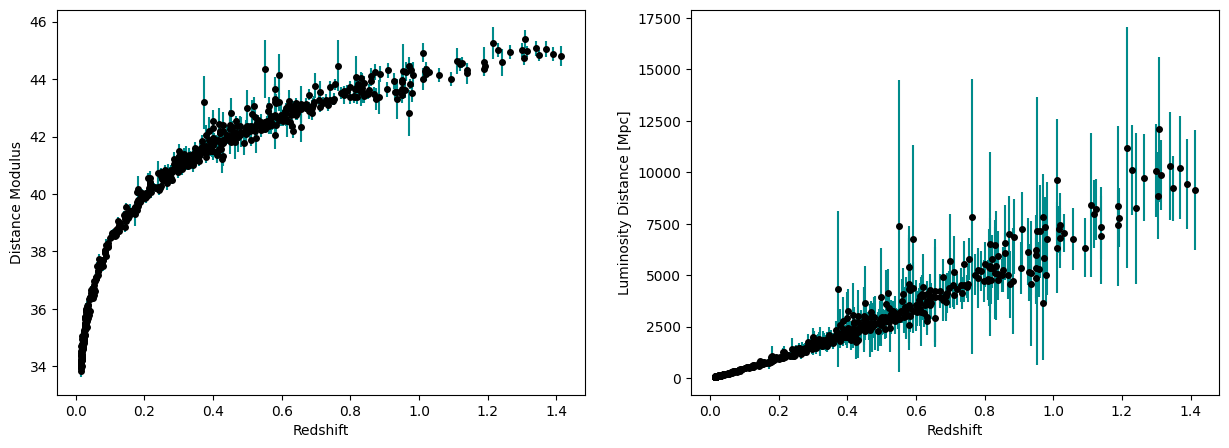

In [51]:
plt.subplots(1, 2, figsize=(15, 5))

# plot distance modulus versus redshift (original data)
plt.subplot(1, 2, 1)
plt.xlabel("Redshift")
plt.ylabel("Distance Modulus")
plt.errorbar(zs, dist_mod, yerr=err_dist_mod, fmt='o', color='black', ecolor='darkcyan', markersize=4)

# plot luminosity distance versus redshift
plt.subplot(1, 2, 2)
plt.xlabel("Redshift")
plt.ylabel("Luminosity Distance [Mpc]")
plt.errorbar(zs, dMpc, yerr=dMe, fmt='o', color='black', ecolor='darkcyan', markersize=4)
plt.show()

## <span style='color:deepskyblue'>Bayes' Theorem: Likelihood, Prior, Posterior (and Evidence...)</span>

The **conditional probability of A given that B is true** is denoted with $P(A|B)$ (read: *probability of A given B*). 
Did A happen? Then B has probability $P(B|A)$ of happening.

[**Bayes' Theorem**](https://en.wikipedia.org/wiki/Bayes%27_theorem) is simply a reflection of the symmetry of the concept of joint probability:

$$
P(A|B)P(B) = P(B|A)P(A)
$$

In physics, our goal is often to determine how likely the values of some parameters $\theta$ are, given how well they reproduce the data $D$. 
We write Bayes' theorem in the following equivalent form:

$$
P(\theta | D) = \frac{P(D|\theta)P(\theta)}{P(D)}
$$

The various terms conventionally take the names:

$$
\begin{aligned}
P(\theta | D) & && \text{Posterior}
\\
P(D | \theta)& && \text{Likelihood}
\\
P(\theta) & && \text{Prior}
\\
P(D) & && \text{Evidence}
\end{aligned}
$$

### <span style='color:deepskyblue'>Prior</span>

The *prior* quantifies our degree of prior belief in the model parameters. It can contain the results of previous experiments, or theoretical considerations (for instance, that certain parameters cannot be negative, etc.). 

We can have *strong priors* about something - the Sun still existing at night, see the comic below - or not.
When we do *not* have compelling prior knowledge about a parameter, we generally use a *non-informative* prior probability distribution, most often related to the [uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution)

$$
\begin{aligned}
    \text{Uniform} & && \theta \in \text{Uniform}[\theta_{\rm min}, \theta_{\rm max}]
    \\
    \text{Log Uniform} & && \log\theta \in \text{Uniform}[\log\theta_{\rm min}, \log\theta_{\rm max}]
\end{aligned}
$$

You may sometimes hear that "the prior doesn't matter". While this is not strictly true, it is however true that in many instances the *likelihood* depends more dramatically on the parameters and will have a dominating contribution to the posterior. You are more than welcome to try different priors for the model parameters and see if and how your results change.

### <span style='color:deepskyblue'>Likelihood</span>

The measure of how well our model reproduces the data is the **likelihood** $\mathcal L$. For normal (=Gaussian), uncorrelated data $\mu_i$ with errors $\sigma_i$ ($i = \{1,580\}$), the likelihood is related to the famous [**chi-squared**](https://en.wikipedia.org/wiki/Chi-square_distribution) via

$$
P(D | \theta) \equiv \mathcal L = \exp\left(-\frac{\chi^2}{2}\right)
\qquad
\qquad
\boxed{
\chi^2 \equiv \sum_{i=1}^{580} \frac{\left(\mu_i^{(\rm theor)} - \mu_i^{(\rm obs)}\right)^2}{\sigma_i^2}
}
$$

A *high likelihood* corresponds to a *low chi squared*.

In principle, we could attack the problem brute-force: create a grid of values for $h$, $\Omega_m$, $\Omega_\Lambda$, calculate the likelihood for each combination, and create a profile for the likelihood. 

In practical cases, however, this is not only sub-optimal but sometimes **impossible**. Think of complicated models with 20+ free parameters (this is not that unusual in physics, by the way). Even a very coarse grained grid of 100 values for each parameter would result in more than$10^{40}$ (!!!) different parameter combination to be tested. You can probably understand why this is undesirable.

### <span style='color:deepskyblue'>Evidence</span>

This is the tricky bit. The evidence, which is "*the probability of observing certain data*", is not something that is easy to evaluate or interpret. This looks like a serious limitation to finding the:


### <span style='color:deepskyblue'>Posterior</span>

What does the data tell us about the model parameters? The answer is the *posterior probability distribution*, often (but not necessarily) expressed as (average $\pm$ standard deviation)

$$
\theta_i = \bar\theta_i \pm \sigma_i
$$

In other words, the posterior tells us how likely it is for the model parameters to have certain values, *given that we observe the data* $D$.

*This is the final goal of our analysis!*

<br>

![title](http://1.bp.blogspot.com/-tTx4HDejSww/ULcTeK9_V_I/AAAAAAAAA8g/PCYOH-eXGbk/s1600/frequentists_vs_bayesians.png)
![title](https://i.redd.it/5r0hwixt0m931.jpg)

## <span style='color:deepskyblue'>Markov-Chain Monte Carlo</span>

Markov-Chain Monte Carlo techniques are a class of methods to sample a probability distribution $P(x)$ - in our case $P(\theta | D)$ - provided that we can calculate a density $\mathcal F(x)$ **that is proportional to it** - in our case $P(\theta)P(D|\theta)$ = likelihood $\times$ prior. Among these, a very popular one is the [**Metropolis-Hastings**](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm) algorithm, which is what we will use.

Schematically, the algorithm works as follows:
* Start with an $n$-tuple of parameters $\theta_{\rm old} = \{\theta_1, \theta_2, \dots\}_{\rm old}$ (in our case $\theta = \{h,\Omega_m,\Omega_\Lambda\}$) and calculate the $\mathcal F_{\rm old}$
* Propose a new set of parameters $\theta_{\rm prop}$, calculate the new corresponding $\mathcal F_{\rm prop}$. How you propose the new parameters is not essential as long as the probability of going from one set of parameters to the next is the same as the inverse: $P(\theta_a \to \theta_b) = P(\theta_b \to \theta_a)$. For this, we normally take Gaussian displacements with some (relatively small) standard deviation.
* Compare the new and old likelihoods-priors:
    * If $\mathcal F_{\rm prop} > \mathcal F_{\rm old}$, accept the step: $\theta_{\rm new} = \theta_{\rm prop}$
    * Otherwise, accept with probability $P_{\rm accept} = \mathcal F_{\rm prop}/\mathcal F_{\rm old}$
* If accepted, $\theta_{\rm new} = \theta_{\rm prop}$ and record the step; otherwise, $\theta_{\rm new} = \theta_{\rm old}$ (no re-recording)
* Update $\theta_{\rm old} = \theta_{\rm new}$
* Repeat

The MC chain keeps going until the desired number of steps or, ideally, when a suitable convergence test, like for example the [Gelman-Rubin test](https://bookdown.org/rdpeng/advstatcomp/monitoring-convergence.html), is satisfied. 
Today we will just set a limit to the total number of steps, but please feel free to implement and test your favourite convergence test!

Looking at equation (4), you can convince yourself that
$$
\frac{\mathcal L_a}{\mathcal L_b} = \exp\left(\frac{\chi_b^2 - \chi_a^2}{2}\right)
$$

(This is useful because $\chi^2$ can be large, so we want to avoid the likelihoods evaluating to `0.` -- computers don't like dividing by zero, unfortunately)
 
* Start with an $n$-tuple of parameters $\theta_{\rm old} = \{\theta_1, \theta_2, \dots\}_{\rm old}$ (in our case $\theta = \{h,\Omega_m,\Omega_\Lambda\}$) and the corresponding chi squared $\chi_{\rm old}^2$ (to be clear, for us this implies calculating a series of 580 integrals and comparing each with the observed values)
* Propose new parameters $\theta_{\rm prop}$ and calculate the corresponding chi squared $\chi_{\rm prop}^2$
* Draw a random number $r \in [0,1]$
* Accept the step if 
$$
r < \exp\left(\frac{\chi_{\rm old}^2 - \chi_{\rm prop}^2}{2}\right) \frac{P(\theta)_{\rm prop}}{P(\theta)_{\rm old}}
$$
    * If accepted, update $\theta_{\rm old} = \theta_{\rm prop}$, and record; otherwise, $\theta_{\rm new} = \theta_{\rm old}$ (no re-recording)
* Repeat

## <span style='color:deepskyblue'>Section 4</span>

In this section we estimate values of, h0, omegalambda, omegamatter. To do so observed and theoretical values are compared. 
Limited in the fact that:
-  Gaussian priors might not reflect the true distribution. 
- Amount of steps chosen at random, but more steps can be chosen to see the implications. 
- Standard deviations chosen at random as well as the initial values. 


In [52]:
# lets start with the n-tupple of theta_old 
# theta old consists of h0, omega_matter and omega_lambda
# chosing initial values of the three important parameters (with arbitrary stddev)
# chosen at random but close to expected value
h_old = 0.68
h_actual= 0.7
h_dev = 0.1

omegamatter_old = 0.29
omegamatter_actual = 0.3
matter_dev = 0.05

omegalambda_old = 0.69
omegalambda_actual = 0.7
lambda_dev = 0.1

# populate array
theta_old = np.array([h_old, omegamatter_old, omegalambda_old])
theta_actual = np.array([h_actual, omegamatter_actual, omegalambda_actual])
theta_dev = np.array([h_dev, matter_dev, lambda_dev])

# next the chi-squared function will be created
# as mentioned a series of 580 integrals 
# use of an array to store the multiple theoretical mu values 
# calculated at different redshift values zs
def chisquared(theta):

    # unpacking theta
    h, omegamatter, omegalambda = theta

    mu_error = err_dist_mod
    mu_observed = dist_mod
    mu_theory = np.array([5* np.log10(dL(z, h, omegamatter, omegalambda)/ 10) for z in zs])
    return np.sum(((mu_theory-mu_observed)**2)/mu_error**2)

# lets start with the markov chain monte carlo now 
# first, initialization of variables, set amount of steps,
# a counter to track amount of accepted values
# and a chain to store parameters in
number_of_steps = 100
acceptedvalues = 0 
mcmcchain = [] 

# chisquared for the old theta values that we already have 
chi2_old = chisquared(theta_old)

for i in range(number_of_steps):

    # generating a random gaussian step to update old theta with, centered around old step
    theta_proposed = np.random.normal(theta_old, theta_dev) 
    chi2_prop = chisquared(theta_proposed)
    delta_chi = chi2_old-chi2_prop

    # computing prior probabilities as per gaussian probability density function
    # extra information gathered from: https://en.wikipedia.org/wiki/Normal_distribution
    # as well as: https://numpy.org/doc/2.1/reference/random/generated/numpy.random.normal.html
    # http://scipy.github.io/devdocs/reference/generated/scipy.stats.norm.html

    # gaussian priors (centered at theta actual)
    # old/new priors and multiply to get total probability
    prior_old = np.prod(sp.norm.pdf(theta_old, theta_actual, theta_dev))
    prior_proposed = np.prod(sp.norm.pdf(theta_proposed, theta_actual, theta_dev))

    r = np.random.uniform(0,1)

    # metropolis-hastings rule to compute acceptance probability
    # improved fit is accepted
    if np.abs(chi2_old - chi2_prop) < 500:
        acceptance = np.exp(delta_chi/2)*(prior_proposed/prior_old)
    else:
        acceptance = 1

    if r < acceptance:
        theta_old = theta_proposed
        chi2_old = chi2_prop
        acceptedvalues += 1

    mcmcchain.append(theta_old)

np.set_printoptions(suppress=True, precision=6)
print(np.array(mcmcchain))


[[ 0.757276  0.360749  0.611913]
 [ 0.754519  0.370495  0.423278]
 [ 0.689222  0.277877  0.52715 ]
 [ 0.722467  0.296648  0.569212]
 [ 0.76314   0.413843  0.521359]
 [ 0.679989  0.36      0.711692]
 [ 0.580702  0.333858  0.8207  ]
 [ 0.827325  0.378396  0.841112]
 [ 0.937932  0.3706    0.988201]
 [ 0.888326  0.421552  0.828604]
 [ 0.772687  0.393596  0.932349]
 [ 0.837411  0.447291  0.996605]
 [ 0.861427  0.389908  0.88408 ]
 [ 0.932403  0.362963  0.905112]
 [ 0.850733  0.425337  0.896865]
 [ 0.676831  0.437981  0.87722 ]
 [ 0.46469   0.50472   0.560025]
 [ 0.300898  0.497394  0.475893]
 [ 0.303842  0.594652  0.482379]
 [ 0.194416  0.605182  0.435662]
 [ 0.139203  0.528776  0.545495]
 [ 0.121858  0.616201  0.592003]
 [ 0.132283  0.590482  0.824236]
 [ 0.346118  0.641457  0.931862]
 [ 0.358074  0.55      0.853006]
 [ 0.635534  0.601877  0.755094]
 [ 0.586328  0.604092  0.634048]
 [ 0.492203  0.616403  0.573492]
 [ 0.568166  0.55478   0.565283]
 [ 0.582886  0.457229  0.516468]
 [ 0.57836

/var/folders/my/g5s1tzcd03j38w8m06jgvhkr0000gn/T/ipykernel_27619/1735439483.py:33: RuntimeWarning: invalid value encountered in log10
  mu_theory = np.array([5* np.log10(dL(z, h, omegamatter, omegalambda)/ 10) for z in zs])


After completion of the programme, your MC chain will (*hopefully*) look something like this:

`#Omega_m  Omega_L  h   
 0.297     0.703    69.8
 0.285     0.715    70.1
 0.288     0.712    69.9
 ...
`

## <span style='color:deepskyblue'>Plotting: GetDist</span>

We will do the plots with [`GetDist`](https://getdist.readthedocs.io/en/latest/plot_gallery.html).

The plot gallery contains a lot of useful examples, you should be able to read them fairly easily and see which applies to your situation. Look for both (triangle) plots and for parameter estimation.

Note that many `GetDist` functions require arguments of type `MCSamples`; make sure you convert your lists accordingly.

Removed no burn in


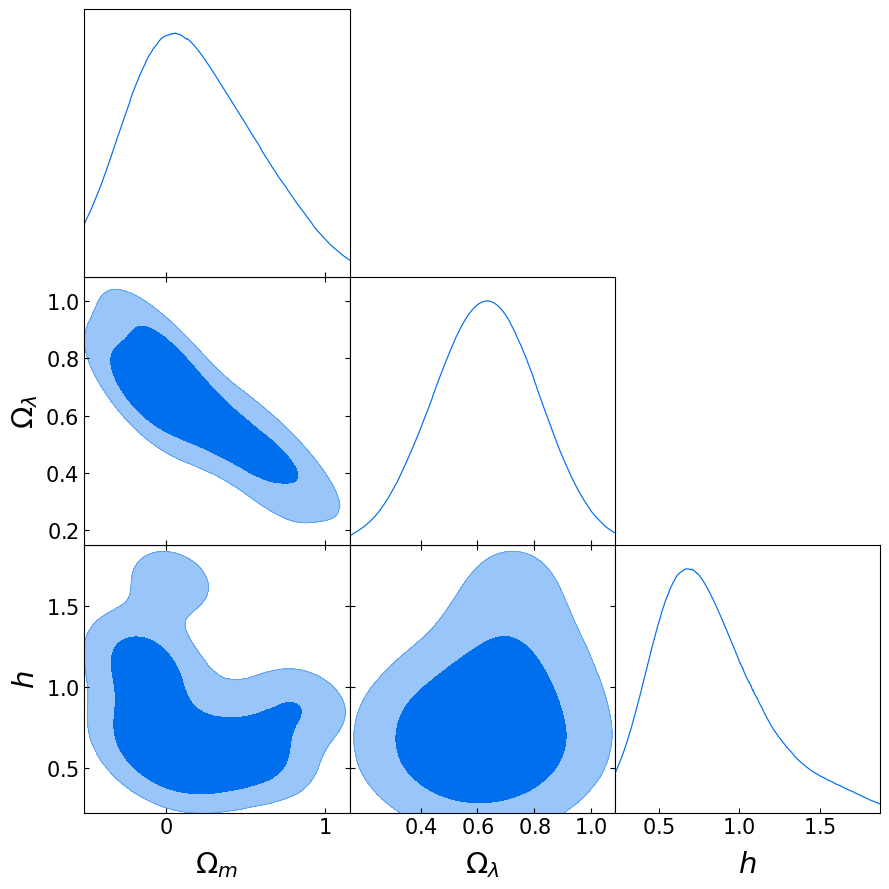

In [53]:
import getdist, IPython
from getdist import plots, MCSamples, loadMCSamples
import numpy as np
import pylab
from random import random
from random import gauss
pylab.rc('text',usetex=False) 

# using my mcmcchain from above as the input 

my_labels = [r'\Omega_m', r'\Omega_\lambda', r'h']
my_names = ['Omega_matter', 'Omega_lambdas', 'h']
samples1 = MCSamples(samples = np.array(mcmcchain), labels = my_labels, names = my_names) 

# triangle corner plot
j = plots.getSubplotPlotter(subplot_size=3)
j.settings.axes_labelsize = 22
j.settings.axes_fontsize = 16
j.triangle_plot(samples1, filled = True)

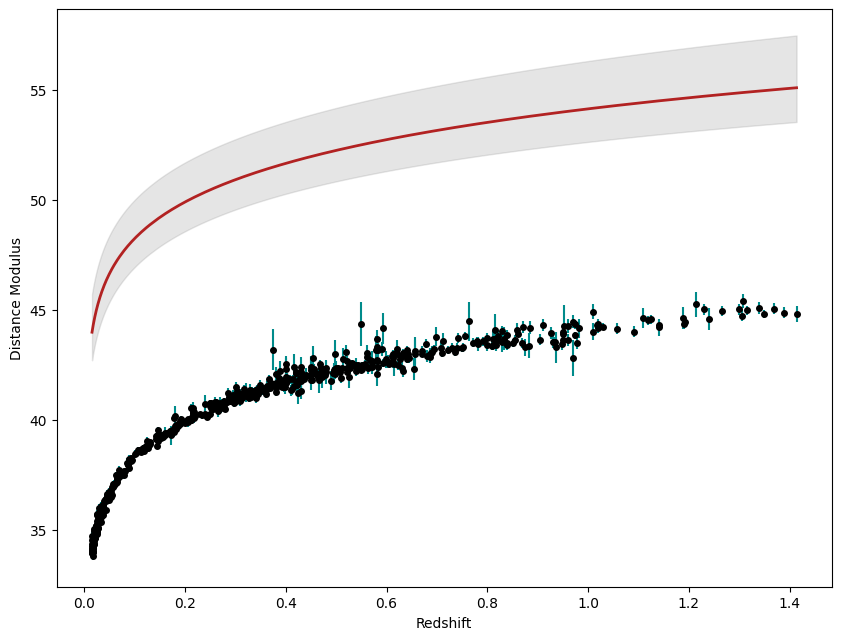

In [54]:
# speed of light 
c = 299792.458

# calculating theoretical luminosity distance 
def theor_luminosity_distance(z, h, OmegaM, OmegaL):
    integral_func = lambda x: 1. / np.sqrt(max(OmegaM * (1.+x)**3 + OmegaL, 1e-10))
    integral_value, error = integrate.quad(integral_func, 0., z)
    return 10.**6 * c / max(h, 1e-10) * (1.+z) * integral_value

# calculating theoretical distance modulus
def theor_distance_modulus(z, h, OmegaM, OmegaL):
    lum_dist = theor_luminosity_distance(z, h, OmegaM, OmegaL)
    if lum_dist <= 0:  # Prevent log of zero or negative values
        return np.nan
    return 5. * np.log10(lum_dist) - 5.

zsort = sorted(zs)
d_best_fit, d_min, d_max = [], [], []

# this is where my results go 

mychain = np.array(mcmcchain)
column_omegamatter = mychain[:, 0]
column_omegalambda = mychain[:, 1]
column_h = mychain[:, 2]

# calculating stddev, min and max to insert into best fit

mean_omegamatter, mean_omegalambda, mean_h = np.mean(column_omegamatter), np.mean(column_omegalambda), np.mean(column_h)
stdv_omegamatter, stdv_omegalambda, stdv_h = np.std(column_omegamatter), np.std(column_omegalambda), np.std(column_h)
max_omegamatter = mean_omegamatter + stdv_omegamatter
max_omegalambda = mean_omegalambda + stdv_omegalambda
max_h       = mean_h + stdv_h
min_omegamatter = max(mean_omegamatter - stdv_omegamatter, 0)
min_omegalambda = max(mean_omegalambda - stdv_omegalambda, 0)
min_h       = max(mean_h - stdv_h, 0)


for z in zsort:
    d_best_fit.append(theor_distance_modulus(z, mean_h, mean_omegamatter, mean_omegalambda))
    d_min.append(theor_distance_modulus(z, min_h, min_omegamatter, min_omegalambda))
    d_max.append(theor_distance_modulus(z, max_h, max_omegamatter, max_omegalambda))

# plotting the graph
plt.subplots(figsize=(10, 7.5))
plt.xlabel("Redshift")
plt.ylabel("Distance Modulus")
plt.errorbar(zs, dist_mod, yerr=err_dist_mod, fmt='o', color='black', ecolor='darkcyan', markersize=4)
plt.plot(zsort, d_best_fit, color='firebrick', linewidth=2.)
plt.fill_between(zsort, d_min, d_max, color='grey', alpha=0.2)
plt.show()
